# Mental Health in Tech: Predicting Traitment-Seeking Behaviour 

## Fourth Notebook: Objective  

This notebook focuses on analyzing the **open-ended comments** from the Mental Health in Tech Survey. After building and evaluating predictive models in the previous notebook, this stage aims to **extract qualitative insights that complement the quantitative findings**.  

The analysis process includes:  

- Cleaning and preprocessing survey comments  
- Identifying recurring themes and sentiments  
- Exploring how comments relate to treatment-seeking behavior  
- Integrating qualitative observations to provide richer context to the modeling results  

The goal is to combine quantitative and qualitative evidence to better understand the experiences and perspectives of tech industry professionals regarding mental health treatment.  

**Author:** J-F Jutras  
**Date:** July-August 2025  
**Dataset:** [Mental Health in Tech Survey (Kaggle)](https://www.kaggle.com/datasets)  


## 4.1-Data Loading

In [1]:
import pandas as pd

#Load the comments dataset for comment analysis
df_comments = pd.read_csv("/kaggle/input/mental-health-comments/mental_health_comments.csv")

#Display basic information
print("Comments dataset successfully loaded!\n")
print(f"Shape: {df_comments.shape[0]} rows × {df_comments.shape[1]} columns\n")

#Quick overview
df_comments.head()

Comments dataset successfully loaded!

Shape: 1233 rows × 99 columns



,comments,work_interfere_encoded,no_emp_100-500,no_emp_26-100,no_emp_500-1000,no_emp_6-25,no_emp_More than 1000,Gender_clean_LGBTQ2+,Gender_clean_Male,Gender_clean_Not Specified,...,phys_health_interview_Yes,mental_vs_physical_No,mental_vs_physical_Yes,obs_consequence_Yes,remote_work_Yes,treatment_encoded,Age_26-35,Age_36-45,Age_46-55,Age_56+
0,NaN,2,0,0,0,0,0,0,1,0,...,1,0,1,1,1,0,0,0,1,0
1,NaN,4,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
2,NaN,2,1,0,0,0,0,0,1,0,...,0,1,0,0,0,1,1,0,0,0
3,NaN,0,0,0,0,0,0,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,NaN,3,0,1,0,0,0,0,1,0,...,0,1,0,0,1,1,0,0,1,0


## 4.2-Preprocessing and cleaning

In [2]:
#Initial exploration of the dataset was already done in Notebook 1
#We focus here on preprocessing and analysis

import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

#Drop missing or empty comments
df_comments = df_comments.dropna(subset=['comments']).copy()
df_comments['comments'] = df_comments['comments'].astype(str).str.strip()
df_comments = df_comments[df_comments['comments'] != ''].copy()

#Create a clean comments column
df_comments['comments_clean'] = df_comments['comments'].copy()

#Lowercase text
df_comments['comments_clean'] = df_comments['comments_clean'].str.lower()

#Remove URLs, emails, mentions, hashtags
df_comments['comments_clean'] = df_comments['comments_clean'].apply(
    lambda x: re.sub(r'http\S+|www\S+|https\S+', '', x))
df_comments['comments_clean'] = df_comments['comments_clean'].apply(
    lambda x: re.sub(r'\S+@\S+', '', x))
df_comments['comments_clean'] = df_comments['comments_clean'].apply(
    lambda x: re.sub(r'@\w+', '', x))
df_comments['comments_clean'] = df_comments['comments_clean'].apply(
    lambda x: re.sub(r'#\w+', '', x))

#Remove punctuation and numbers
df_comments['comments_clean'] = df_comments['comments_clean'].apply(
    lambda x: re.sub(f'[{re.escape(string.punctuation)}0-9]', ' ', x))

#Remove extra spaces
df_comments['comments_clean'] = df_comments['comments_clean'].apply(
    lambda x: re.sub(r'\s+', ' ', x).strip())

#Remove stopwords
stop_words = set(stopwords.words('english'))
df_comments['comments_clean'] = df_comments['comments_clean'].apply(
    lambda x: ' '.join([word for word in x.split() if word not in stop_words])
)

#Lemmatize words
lemmatizer = WordNetLemmatizer()
df_comments['comments_clean'] = df_comments['comments_clean'].apply(
    lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()])
)

print(f"\nDataset shape after cleaning: {df_comments.shape}")


Dataset shape after cleaning: (158, 100)


## 4.3-Comment Analysis

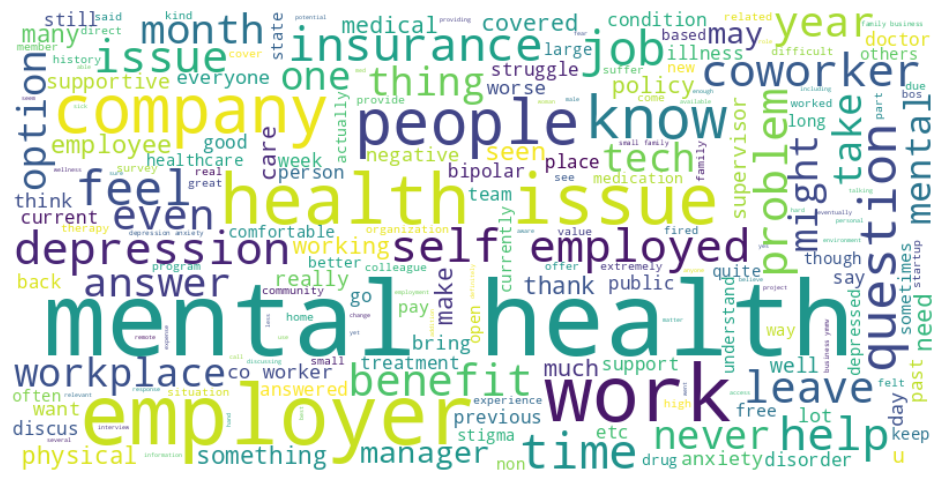

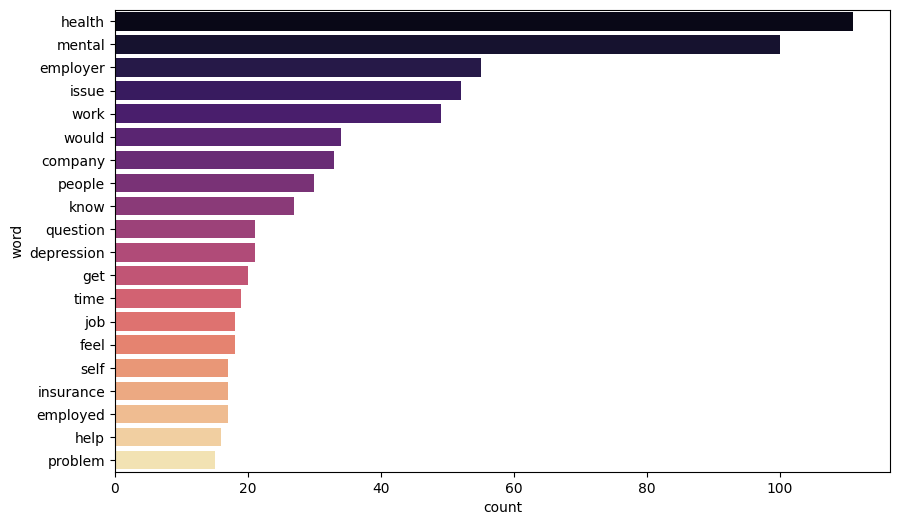

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


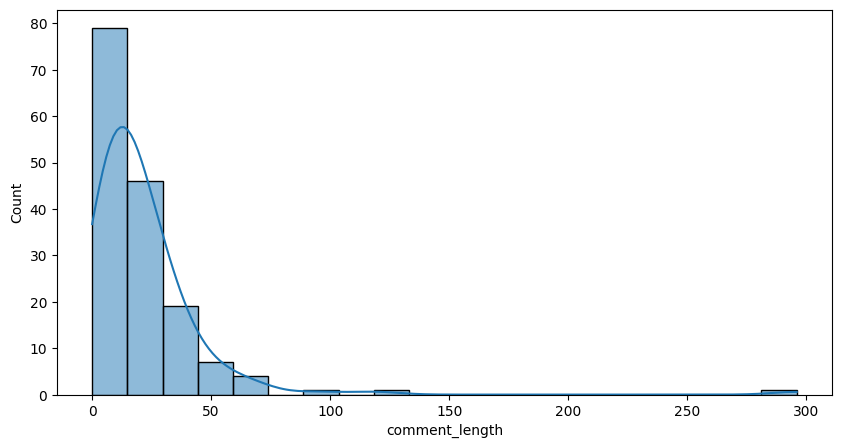

Topic 1: issue, health, mental, employer, work, time, know, depression, would, job
Topic 2: health, mental, help, people, thanks, think, non, company, stigma, tech
Topic 3: work, thank, bipolar, university, important, health, issue, mental, support, developer
Topic 4: small, self, employed, family, business, question, ymmv, health, answer, employer
Topic 5: job, employer, health, depression, mental, know, quite, immediate, get, first


In [3]:
#Word Cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_text = ' '.join(df_comments['comments_clean'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#Most frequent words
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

vectorizer = CountVectorizer(max_df=0.9, min_df=2)
word_count = vectorizer.fit_transform(df_comments['comments_clean'])
words = vectorizer.get_feature_names_out()
counts = word_count.toarray().sum(axis=0)

freq_df = pd.DataFrame({'word': words, 'count': counts}).sort_values(by='count', ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x='count', y='word', data=freq_df.head(20), palette='magma')
plt.show()

#Comment length
df_comments['comment_length'] = df_comments['comments_clean'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10,5))
sns.histplot(df_comments['comment_length'], bins=20, kde=True)
plt.show()

#Topic modeling
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

tfidf_vectorizer = TfidfVectorizer(max_df=0.9, min_df=2)
tfidf_matrix = tfidf_vectorizer.fit_transform(df_comments['comments_clean'])

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(tfidf_matrix)

num_words = 10
feature_names = tfidf_vectorizer.get_feature_names_out()
for idx, topic in enumerate(lda.components_):
    top_words = [feature_names[i] for i in topic.argsort()[-num_words:][::-1]]
    print(f"Topic {idx+1}: {', '.join(top_words)}")



Sample of comments with assigned dominant topic:
                                       comments_clean  dominant_topic
6                        relatively new job ask later               2
7   sometimes think using drug mental health issue...               2
15  selected current employer based policy self ca...               4
27  health plan covered psychotherapy antidepressa...               5
31           started new job last week hence lot know               5

Number of comments per topic:
dominant_topic
1    41
2    31
3    20
4    44
5    22
Name: count, dtype: int64


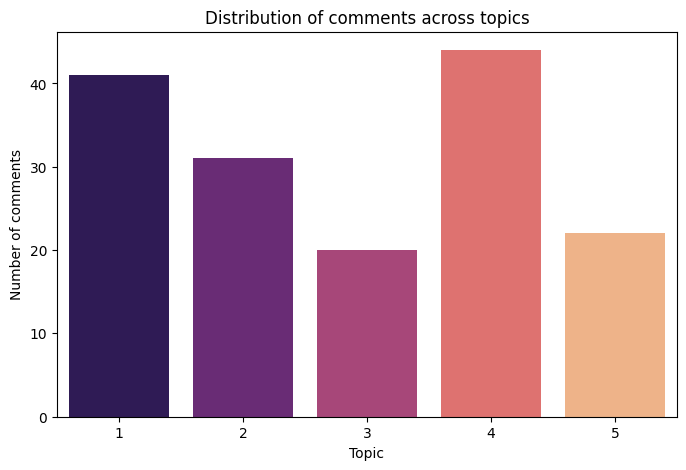

In [4]:
#Assign each comment to its dominant LDA topic
import numpy as np

#Get topic distribution for each comment
topic_distribution = lda.transform(tfidf_matrix)

#Assign the topic with highest probability to each comment
df_comments['dominant_topic'] = np.argmax(topic_distribution, axis=1)

#Shift to 1-5 (to match topics)
df_comments['dominant_topic'] += 1

#Verify assignment
print("\nSample of comments with assigned dominant topic:")
print(df_comments[['comments_clean', 'dominant_topic']].head())

#Distribution of comments per topic
topic_counts = df_comments['dominant_topic'].value_counts().sort_index()
print("\nNumber of comments per topic:")
print(topic_counts)

plt.figure(figsize=(8,5))
sns.barplot(x=topic_counts.index, y=topic_counts.values, palette='magma')
plt.xlabel('Topic')
plt.ylabel('Number of comments')
plt.title('Distribution of comments across topics')
plt.show()


Average treatment-seeking per topic:
dominant_topic
1    0.609756
2    0.612903
3    0.700000
4    0.636364
5    0.727273
Name: treatment_encoded, dtype: float64


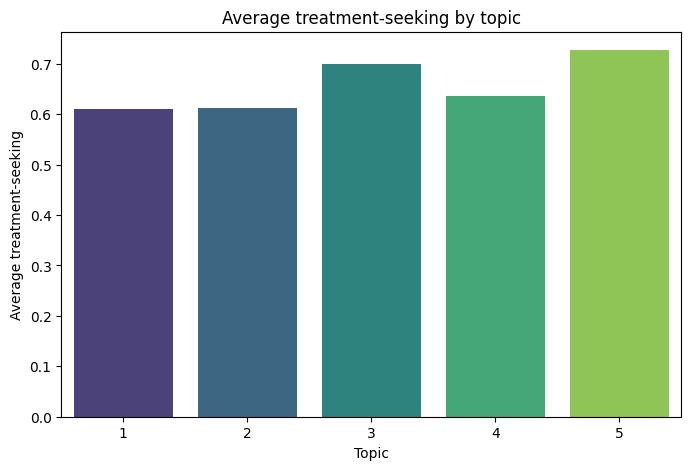

In [5]:
#Cross-topic analysis with treatment_encoded
topic_vs_treatment = df_comments.groupby('dominant_topic')['treatment_encoded'].mean()
print("\nAverage treatment-seeking per topic:")
print(topic_vs_treatment)

#Barplot
plt.figure(figsize = (8,5))
sns.barplot(x = topic_vs_treatment.index, y = topic_vs_treatment.values, palette = 'viridis')
plt.xlabel('Topic')
plt.ylabel('Average treatment-seeking')
plt.title('Average treatment-seeking by topic')
plt.show()

In [6]:
#We synthesize insights from comments to complement quantitative findings

#Function to get top n representative comments per topic
def top_comments_by_topic(df, topic_col='dominant_topic', text_col='comments_clean', n=5):
    top_comments = {}
    for topic in sorted(df[topic_col].unique()):
        topic_df = df[df[topic_col] == topic]
        top_comments[topic] = topic_df[text_col].head(n).tolist()
    return top_comments

#Get top 5 comments per topic
top_comments = top_comments_by_topic(df_comments, n=5)

#Display top comments per topic
for topic, comments in top_comments.items():
    print(f"\nTopic {topic+2} representative comments:")  # topic+2 for 1-5 display
    for idx, c in enumerate(comments, 1):
        print(f"{idx}. {c}")


Topic 3 representative comments:
1. addition mental health issue known several coworkers may suffering know tell empathize want help
2. previous workplace mental health protection policy access counsellor director went far say somewhat casual conversation woman murdered across street best though bipolar worst knowsi bipolar disorder zero faith organization policy place could appropriately handle mental health even less faith workplace without policy place could appropriately handle mental health imagine worse full tech environment
3. worried coworkers workplace culture employer probably legally obligated thing reputation among people work something else instance heard people make snide remark men taking paternity leave want know say mental health leave
4. co worker disappear work week come back let everyone know bipolar responsibility schedule adjusted accommodate got worse show work etc eventually let go tough one hand struggling mental health issue hand went period month performing


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


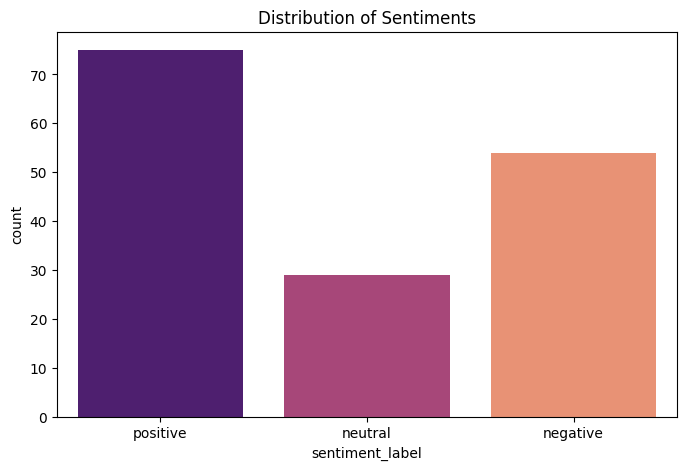


Sentiment distribution by topic:
sentiment_label  negative   neutral  positive
dominant_topic                               
1                0.463415  0.170732  0.365854
2                0.322581  0.161290  0.516129
3                0.250000  0.100000  0.650000
4                0.204545  0.295455  0.500000
5                0.500000  0.090909  0.409091


In [7]:
#Topic modeling + sentiment analysis
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

#TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_df=0.9, min_df=2)
tfidf_matrix = tfidf_vectorizer.fit_transform(df_comments['comments_clean'])

#LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(tfidf_matrix)

#Assign dominant topic to each comment
topic_distribution = lda.transform(tfidf_matrix)
df_comments['dominant_topic'] = topic_distribution.argmax(axis=1) + 1  #topics 1-5

#Sentiment analysis
sia = SentimentIntensityAnalyzer()
df_comments['sentiment_score'] = df_comments['comments_clean'].apply(lambda x: sia.polarity_scores(x)['compound'])

def label_sentiment(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df_comments['sentiment_label'] = df_comments['sentiment_score'].apply(label_sentiment)

#Visualization
plt.figure(figsize=(8,5))
sns.countplot(x='sentiment_label', data=df_comments, order=['positive','neutral','negative'], palette='magma')
plt.title('Distribution of Sentiments')
plt.show()

sentiment_by_topic = df_comments.groupby('dominant_topic')['sentiment_label'].value_counts(normalize=True).unstack()
print("\nSentiment distribution by topic:")
print(sentiment_by_topic)


### Key Findings

**Themes / Topics (LDA, 5 topics):**

- **Topic 1:** Work-related mental health issues – employer policies, depression, workload, stigma.  
- **Topic 2:** Access to mental health support – help, resources, gratitude, awareness, company culture.  
- **Topic 3:** Positive workplace support – small teams, university/tech environments, supportive colleagues.  
- **Topic 4:** Employment status & benefits – self-employment, family business, healthcare coverage.  
- **Topic 5:** Treatment experiences – accessing therapy or medication, new job challenges, barriers.  

**Comment Distribution Across Topics:**

- Topic 1: 41 comments  
- Topic 2: 31 comments  
- Topic 3: 20 comments  
- Topic 4: 44 comments  
- Topic 5: 22 comments  

**Treatment-Seeking Behavior by Topic:**

- Highest average treatment-seeking observed in Topics 5 (0.73) and 3 (0.70).  
- Topics 1 (0.61) and 2 (0.61) show moderate treatment-seeking.  

**Sentiment Analysis (VADER):**

- Topic 3 has the most positive sentiment (65% positive).  
- Topic 5 has a mixed sentiment, with roughly 41% positive and 50% negative.  
- Topic 1 shows the highest negative proportion (46%), reflecting challenges and frustrations at work.  

**Representative Comments:**

- Selected top comments illustrate the main concerns, experiences, and emotional tone for each topic.  
- Examples highlight barriers to treatment, supportive workplaces, policy impacts, and personal coping strategies.  

**Next Step: GenAI Interpretation**

- We will use Generative AI to perform a qualitative interpretation of the anonymized comments, extracting insights and summarizing key themes in natural language to complement our quantitative and topic modeling analysis.

## 4.4-LLM Prompt : Mental Health Survey Analysis

**Prompt for Synthesizing Mental Health Survey Comments in Tech**

You are an expert in **workplace mental health, data analysis, and human-centered insights**, specializing in the tech industry. You are provided with a dataset from a global survey on mental health in tech workplaces. The dataset includes:  

- Demographic variables (Age, Gender, Country, State, etc.)  
- Employment-related variables (Self-employed status, Company size, Remote work, Tech company, etc.)  
- Mental health variables (Family history, Treatment sought, Work interference, Benefits, Wellness programs, Mental health consequences, etc.)  
- **Open-ended comments** from respondents about their experiences with mental health at work.  

**Objective:**  

Analyze the comments (`comments` column) to produce a **detailed, structured synthesis** that identifies:  

1. **Recurring problems and obstacles** employees face regarding mental health.  
2. **Employee needs and expectations** for better mental health support.  
3. **Actionable solutions and recommendations** for improving mental health support at tech workplaces.  
4. **Contextual insights** by relating themes in comments to other survey variables (e.g., country, company size, remote work, benefits, treatment history, self-employment).  

**Methodology:**  

1. **Clean and preprocess** the comments to remove noise, typos, and irrelevant content.  
2. **Identify key themes** by clustering or grouping similar ideas (examples: stigma, manager support, access to therapy, remote work, workplace culture, discrimination, diversity, burnout).  
3. **Perform sentiment analysis** to detect positive, negative, or neutral attitudes in the comments.  
4. **Link comments to survey variables** where relevant to highlight patterns or correlations (e.g., comments from remote workers vs. in-office workers, self-employed vs. employees in large tech companies).  
5. **Generate recommendations** for each theme: actionable, realistic, and relevant to tech workplaces. Consider feasibility, potential impact, and inclusivity.  
6. **Produce a clear synthesis** including:  
   - Introduction summarizing overall trends  
   - Thematic sections: each with  
     - Theme title  
     - Summary of observations  
     - Representative anonymized comment examples  
     - Recommendations for action  
   - Conclusion with high-level insights and suggested next steps for organizations  

**Additional Instructions:**  

- Maintain a neutral, analytical tone, but clearly highlight problems and risks.  
- Emphasize actionable insights that can guide policy or workplace interventions.  
- Note any recurring differences based on geographic, organizational, or demographic factors.  
- Avoid generic statements; use the content of comments to support each observation.  

## 4.5-Qualitative insights via GenAI on Anonymized Comments

The analysis of the comments reveals that mental health in the tech industry is strongly influenced by organizational support, company culture, and HR policies. Many respondents note that even when benefits exist, stigma, lack of manager understanding, and fear of discrimination limit actual access to care and the ability to express needs. Remote work and flexibility are cited as factors that help manage mental health issues, whereas in small startups or highly hierarchical environments, confidentiality and access to resources remain challenging.

Another recurring theme is individual experiences with benefits and treatment, often influenced by country, type of employer, or employment status (self-employed vs. employee). Some comments highlight gaps in coverage (therapy, psychiatric care, treatments for specific needs such as trans healthcare) or administrative and financial barriers, even in otherwise supportive organizations. Negative past experiences, such as being let go or having performance judged due to mental health issues, contribute to hesitancy to disclose problems to current or future employers.

Finally, employees express a clear need for inclusive policies, transparent communication, and a supportive company culture. Implicit recommendations include training managers on mental health, improving access to care and resources, and creating an environment where employees can speak openly about their difficulties without fear of professional consequences. Positive experiences show that genuine leadership engagement and organizational flexibility can greatly improve employee well-being and reduce stigma around mental health in tech.